# Usage Example
This example is based on that of scikit-learn, [Joint feature selection with multi-task Lasso](https://scikit-learn.org/stable/auto_examples/linear_model/plot_multi_task_lasso_support.html)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import MultiTaskLasso, Lasso

from pygflasso import MultiTaskGFLasso

rng = np.random.RandomState(42)

# Generate some 2D coefficients with sine waves with random frequency and phase
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks // 2)
for k in range(n_relevant_features):
    coef[:n_tasks // 2, k] = np.sin((1. + rng.randn(1)) * times + 3 * rng.randn(1))
    coef[n_tasks // 2:, k] = coef[:n_tasks // 2, k]

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

coef_lasso_ = np.array([Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T])
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.).fit(X, Y).coef_

In [31]:
G = np.identity(n_tasks)
# G = np.zeros((n_tasks, n_tasks))
for j in range(n_tasks // 2):
    G[j, n_tasks // 2 + j] = G[n_tasks // 2 + j, j] = 1.0
gfl = MultiTaskGFLasso(G, verbose=True, max_iter=1000, lamb=1.0, eps=1.0).fit(X, Y)
coef_multi_task_gflasso_ = gfl.coef_

Iter   1: diff = inf, loss = 7.043827e+03
Iter   2: diff = 6.752278e-04, loss = 6.998215e+03
Iter   3: diff = 9.499391e-04, loss = 6.935024e+03
Iter   4: diff = 1.204862e-03, loss = 6.855518e+03
Iter   5: diff = 1.450708e-03, loss = 6.760578e+03
Iter   6: diff = 1.688707e-03, loss = 6.651135e+03
Iter   7: diff = 1.918615e-03, loss = 6.528212e+03
Iter   8: diff = 2.139545e-03, loss = 6.392925e+03
Iter   9: diff = 2.350545e-03, loss = 6.246472e+03
Iter  10: diff = 2.550828e-03, loss = 6.090115e+03
Iter  11: diff = 2.739760e-03, loss = 5.925170e+03
Iter  12: diff = 2.916781e-03, loss = 5.752984e+03
Iter  13: diff = 3.081389e-03, loss = 5.574920e+03
Iter  14: diff = 3.233282e-03, loss = 5.392341e+03
Iter  15: diff = 3.372087e-03, loss = 5.206594e+03
Iter  16: diff = 3.497389e-03, loss = 5.018996e+03
Iter  17: diff = 3.608833e-03, loss = 4.830816e+03
Iter  18: diff = 3.706128e-03, loss = 4.643265e+03
Iter  19: diff = 3.789231e-03, loss = 4.457485e+03
Iter  20: diff = 3.858565e-03, loss = 4.

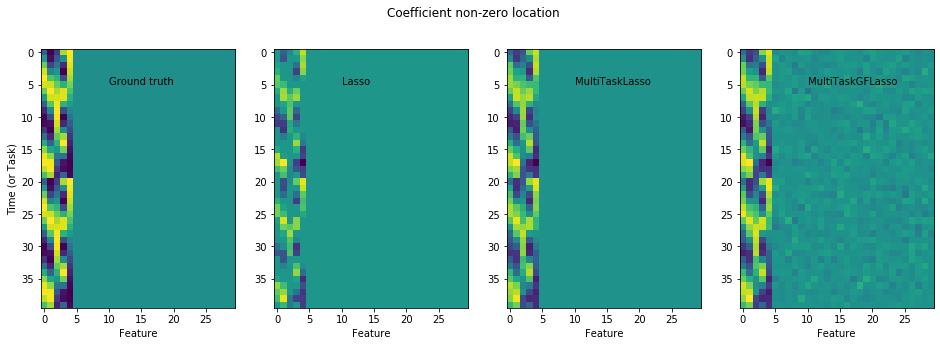

In [32]:
fig = plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 1)
plt.imshow(coef)
plt.xlabel('Feature')
plt.ylabel('Time (or Task)')
plt.text(10, 5, 'Ground truth')
plt.subplot(1, 4, 2)
plt.imshow(coef_lasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'Lasso')
plt.subplot(1, 4, 3)
plt.imshow(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'MultiTaskLasso')
plt.subplot(1, 4, 4)
plt.imshow(coef_multi_task_gflasso_)
plt.xlabel('Feature')
plt.text(10, 5, 'MultiTaskGFLasso')
fig.suptitle('Coefficient non-zero location')
plt.show()

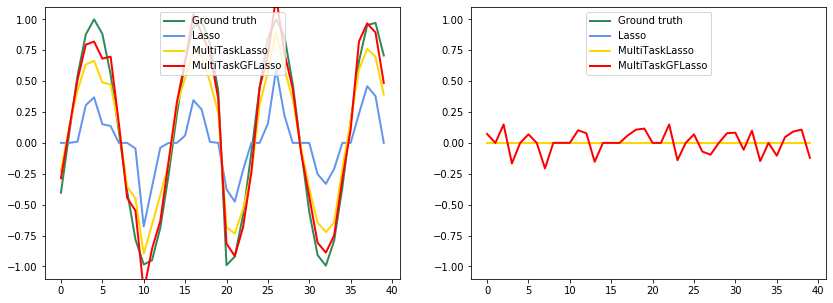

In [29]:

fig = plt.figure(figsize=(14, 5))
lw = 2

plt.subplot(1, 2, 1)
feature_to_plot = 0
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.plot(coef_multi_task_gflasso_[:, feature_to_plot], color='red', linewidth=lw,
         label='MultiTaskGFLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])

plt.subplot(1, 2, 2)
feature_to_plot = -1
plt.plot(coef[:, feature_to_plot], color='seagreen', linewidth=lw,
         label='Ground truth')
plt.plot(coef_lasso_[:, feature_to_plot], color='cornflowerblue', linewidth=lw,
         label='Lasso')
plt.plot(coef_multi_task_lasso_[:, feature_to_plot], color='gold', linewidth=lw,
         label='MultiTaskLasso')
plt.plot(coef_multi_task_gflasso_[:, feature_to_plot], color='red', linewidth=lw,
         label='MultiTaskGFLasso')
plt.legend(loc='upper center')
plt.axis('tight')
plt.ylim([-1.1, 1.1])

plt.show()